Анализ задачи о трех кругах

In [1]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Зададим все необходимые переменные и реализуем все функции для алгоритма аналогичного программе на c++

In [4]:
# Параметры из задания
x1, y1, r1 = 1.0, 1.0, 1.0
x2, y2, r2 = 1.5, 2.0, np.sqrt(5)/2
x3, y3, r3 = 2.0, 1.5, np.sqrt(5)/2

def is_inside_area(x, y):
    dist1 = (x - x1)**2 + (y - y1)**2
    dist2 = (x - x2)**2 + (y - y2)**2
    dist3 = (x - x3)**2 + (y - y3)**2

    return (dist1 <= r1**2) and (dist2 <= r2**2) and (dist3 <= r3**2)

def monte_carlo_area(n_points, x_min, x_max, y_min, y_max):
    count_inside = 0
    for _ in range(n_points):
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        if is_inside_area(x, y):
            count_inside += 1

    rectangle_area = (x_max - x_min) * (y_max - y_min)
    return (count_inside / n_points) * rectangle_area


# Площадь реальной фигуры
def exact_area():
    S_T = 0.5
    S_C1 = 0.25 * math.pi - 0.5
    S_C2 = 1.25 * math.asin(0.8) - 1

    return S_T + S_C1 + S_C2

# Широкая область
x_min_wide = min(x1 - r1, x2 - r2, x3 - r3)
x_max_wide = max(x1 + r1, x2 + r2, x3 + r3)
y_min_wide = min(y1 - r1, y2 - r2, y3 - r3)
y_max_wide = max(y1 + r1, y2 + r2, y3 + r3)

# Узкая область
x_min_narrow = 0.87
x_max_narrow = 2.1
y_min_narrow = 0.87
y_max_narrow = 2.1

Запускаем алгоритм на различных данных(разные n, и размер области) и составляем таблицу для удобного представления данных

In [9]:
results = []
for n in range (100, 100000, 500):
    S_wide = monte_carlo_area(n, x_min_wide, x_max_wide, y_min_wide, y_max_wide)
    error_wide = abs(S_wide - exact_area()) / exact_area()

    # Узкая область
    S_narrow = monte_carlo_area(n, x_min_narrow, x_max_narrow, y_min_narrow, y_max_narrow)
    error_narrow = abs(S_narrow - exact_area()) / exact_area()

    results.append({
        'n': n,
        'S_wide': S_wide,
        'S_narrow': S_narrow,
        'error_wide': error_wide,
        'error_narrow': error_narrow
    })
df = pd.DataFrame(results)
df

,n,S_wide,S_narrow,error_wide,error_narrow
0,100,0.680550,1.089288,0.279474,0.153275
1,600,1.004621,0.948084,0.063634,0.003776
2,1100,1.034082,0.946250,0.094826,0.001835
3,1600,1.032977,0.944617,0.093656,0.000106
4,2100,0.981473,0.964654,0.039126,0.021320
...,...,...,...,...,...
195,97600,0.949602,0.943671,0.005383,0.000895
196,98100,0.945951,0.941005,0.001518,0.003718
197,98600,0.939576,0.941051,0.005231,0.003669
198,99100,0.959852,0.943463,0.016236,0.001116


Строим график первого типа

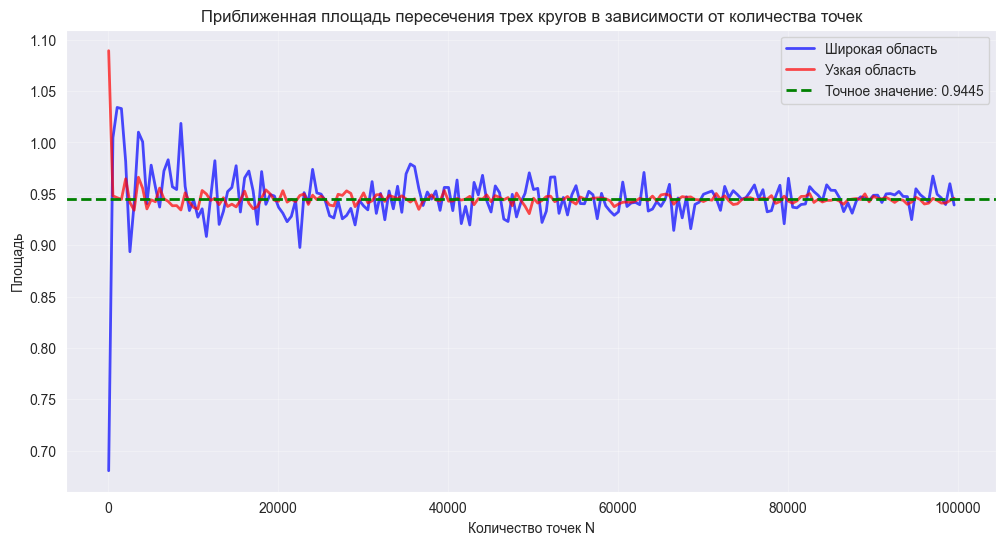

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['n'], df['S_wide'], 'b-', alpha=0.7, label='Широкая область', linewidth=2)
plt.plot(df['n'], df['S_narrow'], 'r-', alpha=0.7, label='Узкая область', linewidth=2)
plt.axhline(y=exact_area(), color='g', linestyle='--', label=f'Точное значение: {exact_area():.4f}', linewidth=2)
plt.xlabel('Количество точек N')
plt.ylabel('Площадь')
plt.title('Приближенная площадь пересечения трех кругов в зависимости от количества точек')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Уберем первые 3 наблюдения, чтобы лучше была видна тенденция на больших N

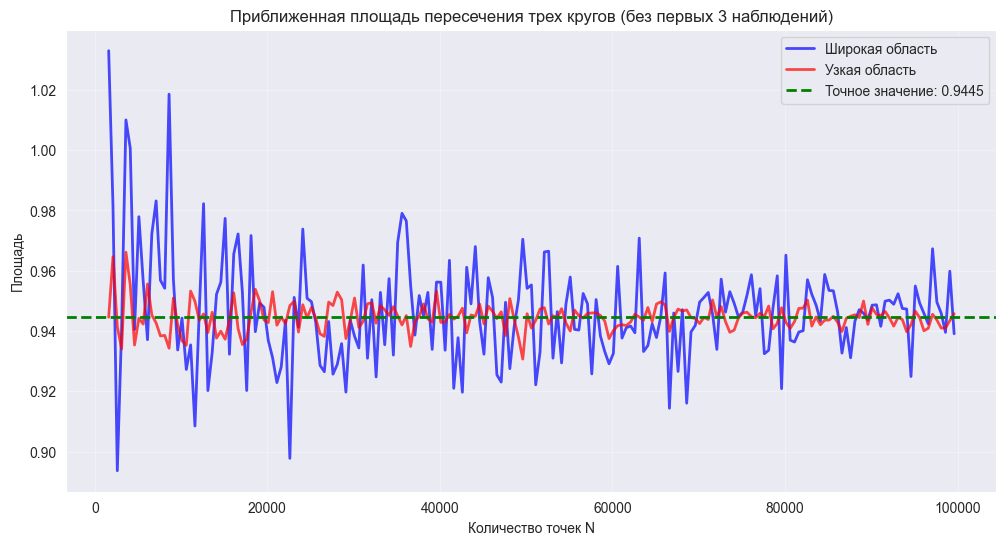

In [12]:
df_filtered = df.iloc[3:].copy()

# График 1: Приближенные значения площади (без первых 3 точек)
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['n'], df_filtered['S_wide'], 'b-', alpha=0.7, label='Широкая область', linewidth=2)
plt.plot(df_filtered['n'], df_filtered['S_narrow'], 'r-', alpha=0.7, label='Узкая область', linewidth=2)
plt.axhline(y=exact_area(), color='g', linestyle='--', label=f'Точное значение: {exact_area():.4f}', linewidth=2)
plt.xlabel('Количество точек N')
plt.ylabel('Площадь')
plt.title('Приближенная площадь пересечения трех кругов (без первых 3 наблюдений)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Выводы:
По построению первого графика можно заметить, что алгоритм дает сильную погрешность в ответе
при малых N вне зависимости от ширины области. Чтобы лучше были видны изменения был построен второй график, в котором убраны первые эксперименты с большой погрешностью.
На втором графике явно выражена большая амплитуда значений у широкой области(синяя линия), в то время как у узкой области колебания значений меньше, что говорит нам о более высокой точности ответа(ответы в среднем ближе к реальному значению площади(зеленая линия))

Строим график второго типа

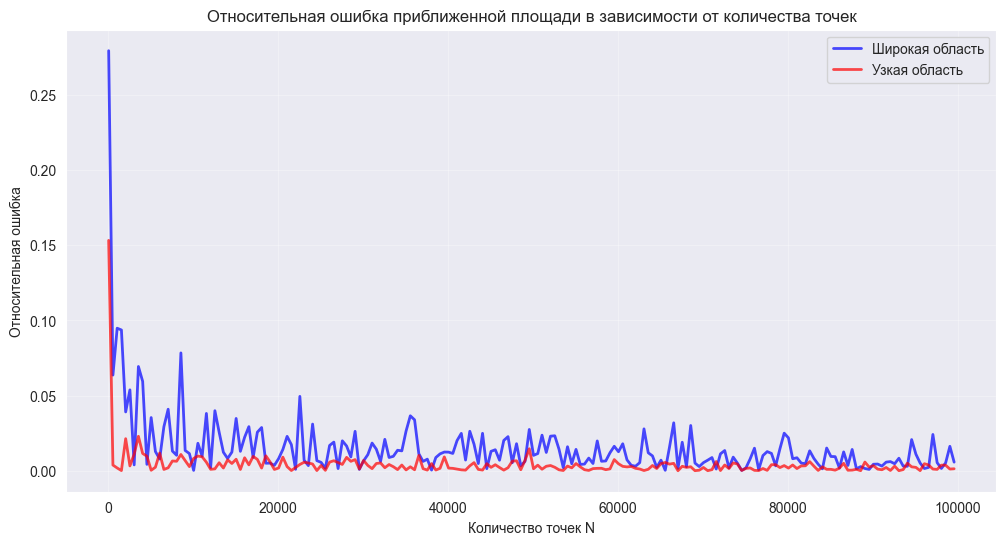

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['n'], df['error_wide'], 'b-', alpha=0.7, label='Широкая область', linewidth=2)
plt.plot(df['n'], df['error_narrow'], 'r-', alpha=0.7, label='Узкая область', linewidth=2)
plt.xlabel('Количество точек N')
plt.ylabel('Относительная ошибка')
plt.title('Относительная ошибка приближенной площади в зависимости от количества точек')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Уберем первые 3 наблюдения, чтобы лучше была видна тенденция на больших N

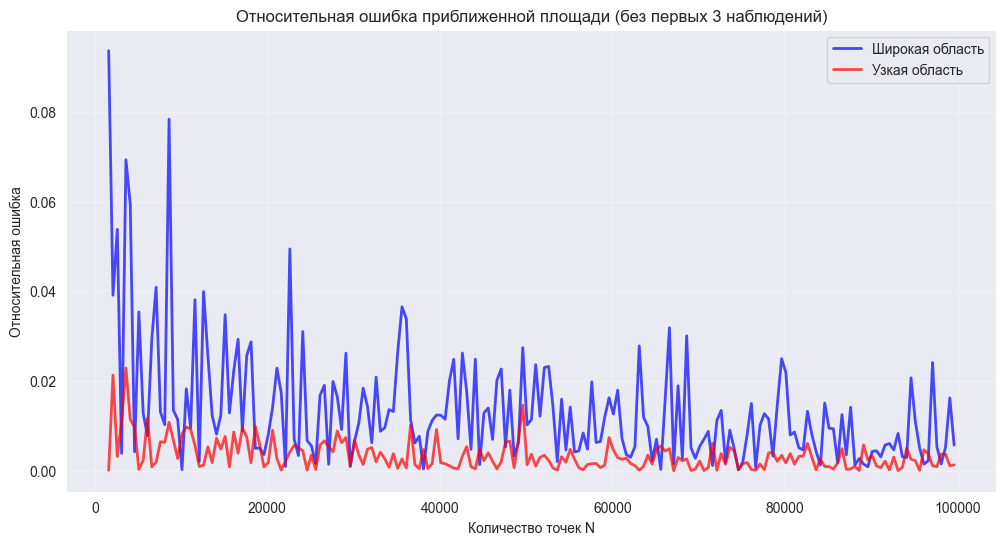

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['n'], df_filtered['error_wide'], 'b-', alpha=0.7, label='Широкая область', linewidth=2)
plt.plot(df_filtered['n'], df_filtered['error_narrow'], 'r-', alpha=0.7, label='Узкая область', linewidth=2)
plt.xlabel('Количество точек N')
plt.ylabel('Относительная ошибка')
plt.title('Относительная ошибка приближенной площади (без первых 3 наблюдений)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Выводы:
По первому из графиков второго типа также видим сильное отклонение в начале, которое мешает дальнейшему анализу, поэтому также был построен второй график без учета начальных значений.
На последнем графике видно, что синий график(широкая область) практически всегда показывает большие значения, т.е. большую ошибку значений, чем красный(узкая область). Также в начале графика видна тенденция на уменьшение относительной ошибки при увеличении N, но на больших значениях N ошибка колеблется примерно в одинаковой области(верхние границы: примерно 0,01 у узкой области и 0,03 у широкой области, что на порядок больше)

Общий вывод:
Для получения более точных результатов, нужно использовать алгоритм на более узкой области, т.к. она дает меньшее отклонение от реальной площади, в то время как алгоритм на широкой области будет в большинстве случаев ошибаться сильнее.
Также на основе экспериментов видно, что необходимо использовать количество точек N > 10000 для лучшего результата.